In [1]:
pip install tensorflow numpy matplotlib opencv-python scikit-learn imbalanced-learn streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Found 9600 images belonging to 10 classes.
Found 2400 images belonging to 10 classes.
Class Distribution: Counter({0: 960, 1: 960, 2: 960, 3: 960, 4: 960, 5: 960, 6: 960, 7: 960, 8: 960, 9: 960})


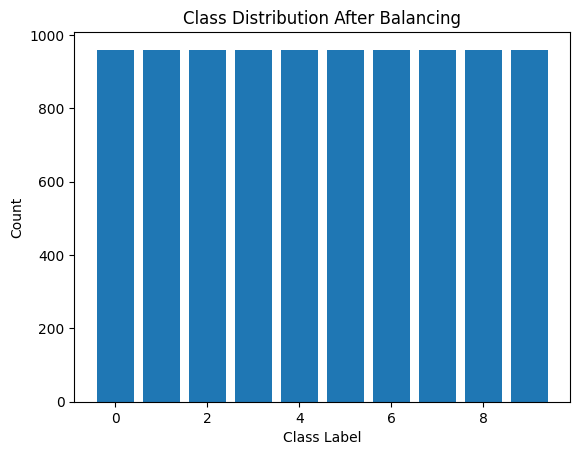

In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Define dataset path
dataset_path = "C:/Users/nmiru/OneDrive/Desktop/numbers"  # Change this to your dataset path
img_size = (224, 224)  # Resize images to 224x224
batch_size = 32  # Adjust based on available GPU

# Load images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_data = datagen.flow_from_directory(dataset_path, target_size=img_size, batch_size=batch_size,
                                         class_mode='categorical', subset='training')

val_data = datagen.flow_from_directory(dataset_path, target_size=img_size, batch_size=batch_size,
                                       class_mode='categorical', subset='validation')

# Get class distribution
class_counts = Counter(train_data.classes)
print("Class Distribution:", class_counts)

# Handle class imbalance using oversampling
X_train, y_train = train_data.filepaths, train_data.classes
oversample = RandomOverSampler()
X_train_resampled, y_train_resampled = oversample.fit_resample(np.array(X_train).reshape(-1, 1), y_train)

# Visualize class distribution after oversampling
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution After Balancing")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


Found 9600 images belonging to 10 classes.
Found 2400 images belonging to 10 classes.


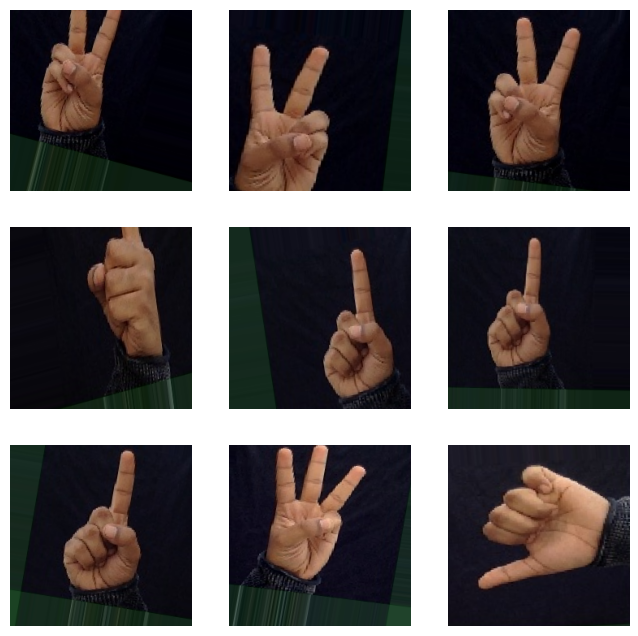

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from collections import Counter

# Define dataset path
dataset_path = "C:/Users/nmiru/OneDrive/Desktop/numbers" # Change this

# Data Augmentation
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,  # Rotate images randomly
    width_shift_range=0.2,  # Shift horizontally
    height_shift_range=0.2,  # Shift vertically
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% data for validation
)

# Load training and validation data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Visualize augmented images
def show_augmented_images():
    x_batch, y_batch = next(iter(train_data))
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_batch[i])
        plt.axis('off')
    plt.show()

show_augmented_images()


In [4]:
pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Before Oversampling: Counter({0: 960, 1: 960, 2: 960, 3: 960, 4: 960, 5: 960, 6: 960, 7: 960, 8: 960, 9: 960})
After Oversampling: Counter({0: 960, 1: 960, 2: 960, 3: 960, 4: 960, 5: 960, 6: 960, 7: 960, 8: 960, 9: 960})


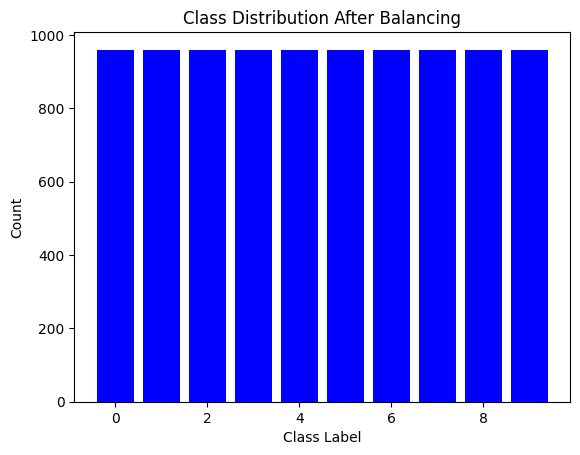

In [5]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np

# Get class distribution
class_counts = Counter(train_data.classes)
print("Before Oversampling:", class_counts)

# Apply oversampling
X_train, y_train = np.array(train_data.filepaths), np.array(train_data.classes)
oversample = RandomOverSampler()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train.reshape(-1, 1), y_train)

# Visualize new class distribution
new_counts = Counter(y_train_resampled)
print("After Oversampling:", new_counts)

plt.bar(new_counts.keys(), new_counts.values(), color='blue')
plt.title("Class Distribution After Balancing")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Load MobileNetV2 (pre-trained model)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(len(train_data.class_indices), activation='softmax')(x)

# Compile model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save the trained model
model.save("N_model1.h5")


C:\Users\nmiru\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
⚠️ Warning: OverflowError caught in signbit. Using fallback zeros.
⚠️ Warning: OverflowError caught in signbit. Using fallback zeros.
⚠️ Warning: OverflowError caught in signbit. Using fallback zeros.
⚠️ Warning: OverflowError caught in signbit. Using fallback zeros.
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 991ms/step - accuracy: 0.8726 - loss: 0.4802⚠️ Warning: OverflowError caught in signbit. Using fallback zeros.
⚠️ Warning: OverflowError caught in signbit. Using fallback zeros.
300/300 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.8729 - loss: 0.4791 - val_accuracy: 0.9996 - val_loss: 0.0058
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 150s 500ms/step - accuracy: 0.9984 - loss: 0.0105 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 165s 550ms/step - accuracy: 0.9989 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 154s 513ms/step - accuracy: 0.9999 - loss: 0.0024 - val_accuracy: 0.9996 - val_loss: 0.00

75/75 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 1.0000 - loss: 8.5849e-05
Validation Accuracy: 100.00%


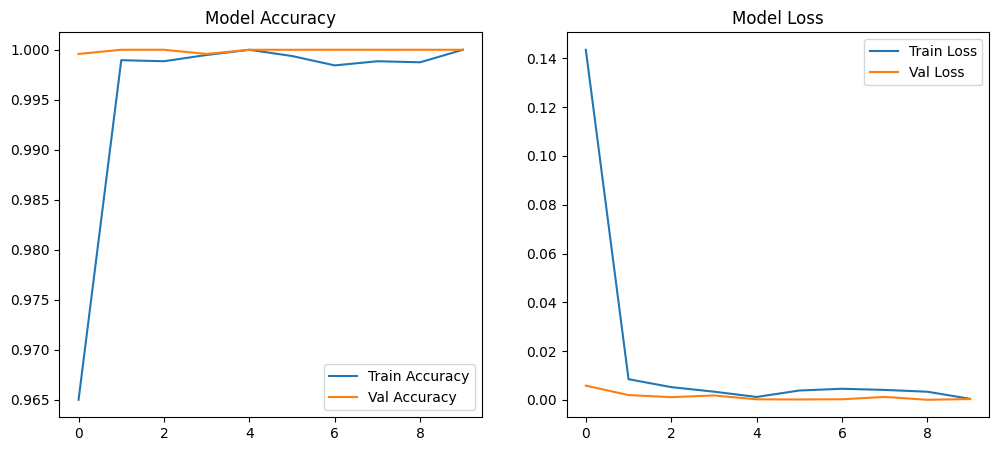

In [7]:
# Evaluate model
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")

# Plot accuracy & loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [8]:
import os

dataset_path = "C:/Users/nmiru/OneDrive/Desktop/numbers"  # Change this to your dataset location

# Get all class names (folder names)
class_names = sorted(os.listdir(dataset_path))
print("Classes:", class_names)

# Assigning new class indices
class_labels = {i: class_name for i, class_name in enumerate(class_names)}
print(class_labels)


Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
